<a href="https://colab.research.google.com/github/Arushi3012/Loan-Prediction/blob/main/DT_and_RF_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Explain steps involve for random forest

For this project you have to explore publicaly available data from landingclub.com. This club connect people who need money with the people who have money. As an investor you would want to invest in people who showed a profile of having a high probability of paying back.try to create model that would help investors to predict the same.

**Objective**:- To use landing data from 2007 to 2010 and try to classify and predict whether or not the borrower payed back there loan amount. (csv provided is clean for Na values.)

In [ ]:
import pandas as pd
data = pd.read_csv('loan_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix

X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values.reshape(-1,1)
print(X)
c = ColumnTransformer([('encode',OneHotEncoder(),[1])],remainder='passthrough')
X = c.fit_transform(X)
print(X)
xtr,xts,ytr,yts = train_test_split(X,Y,test_size = 0.3,random_state = 0)

n=[0,2,3,4,5,6,7,8,9,10,11]

scalar = StandardScaler()
xtr[:, n] = scalar.fit_transform(xtr[:, n])
xts[:, n] = scalar.transform(xts[:, n])

model = RandomForestClassifier()
model.fit(xtr,ytr)

pred = model.predict(xts)
#print('actual: ', yts)
#print('predicted',pred)



[[1 'debt_consolidation' 0.1189 ... 0 0 0]
 [1 'credit_card' 0.1071 ... 0 0 0]
 [1 'debt_consolidation' 0.1357 ... 1 0 0]
 ...
 [0 'debt_consolidation' 0.1071 ... 8 0 0]
 [0 'home_improvement' 0.16 ... 5 0 0]
 [0 'debt_consolidation' 0.1392 ... 6 0 0]]
[[0.0 0.0 1.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 0.0 1.0 ... 1 0 0]
 ...
 [0.0 0.0 1.0 ... 8 0 0]
 [0.0 0.0 0.0 ... 5 0 0]
 [0.0 0.0 1.0 ... 6 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
X[1]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.1071, 228.22, 11.08214255,
       14.29, 707, 2760.0, 33623, 76.7, 0, 0, 0], dtype=object)

# Solution

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Get the data
loans = pd.read_csv('loan_data.csv')

#check on the info
print(loans.info())
print(loans.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None
       credit.policy     int.rate  installment  log.annual

Text(0.5, 0, 'FICO')

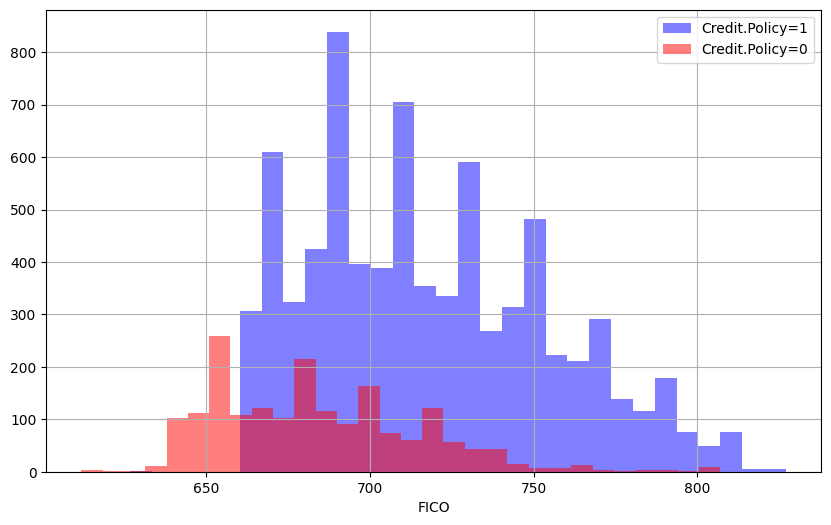

In [ ]:
#Exploratory data analysis
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

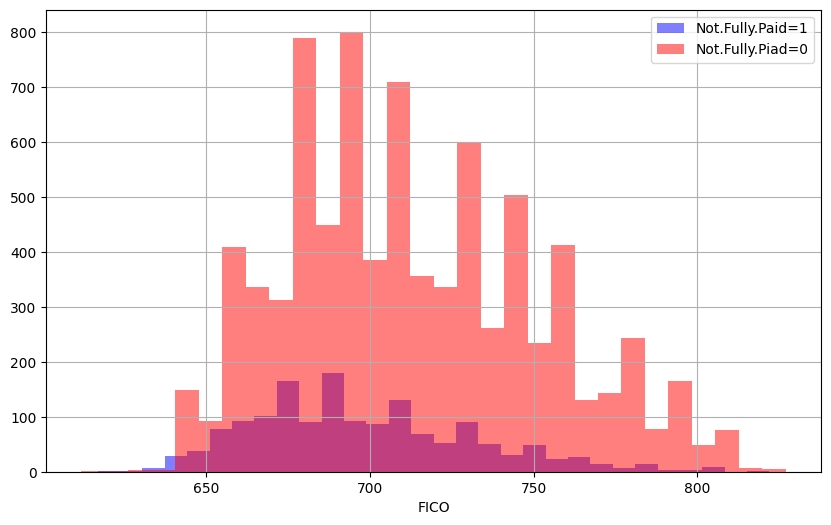

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,bins=30,color='blue',label='Not.Fully.Paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,bins=30,color='red',label='Not.Fully.Piad=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

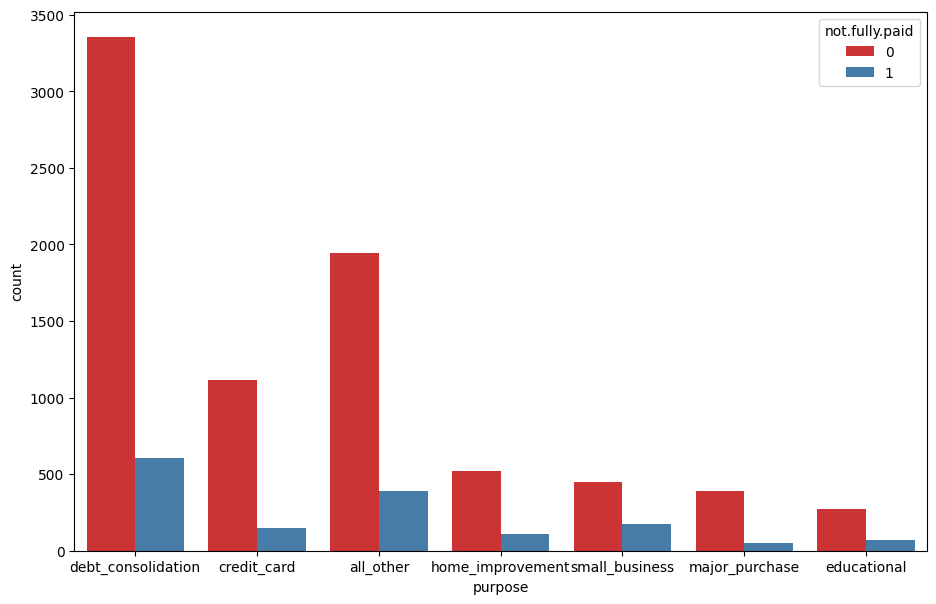

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',data=loans,hue='not.fully.paid',palette='Set1')

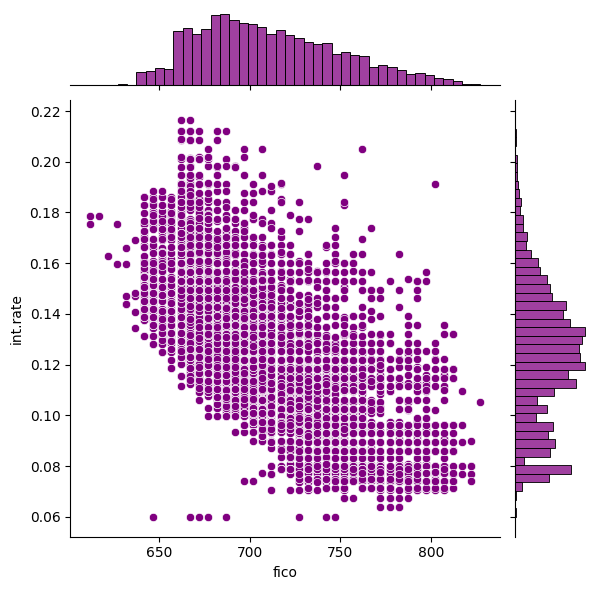

In [ ]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

check the documentation for implot() if you cannot figure out how to saparate coloumns

<Figure size 1100x700 with 0 Axes>

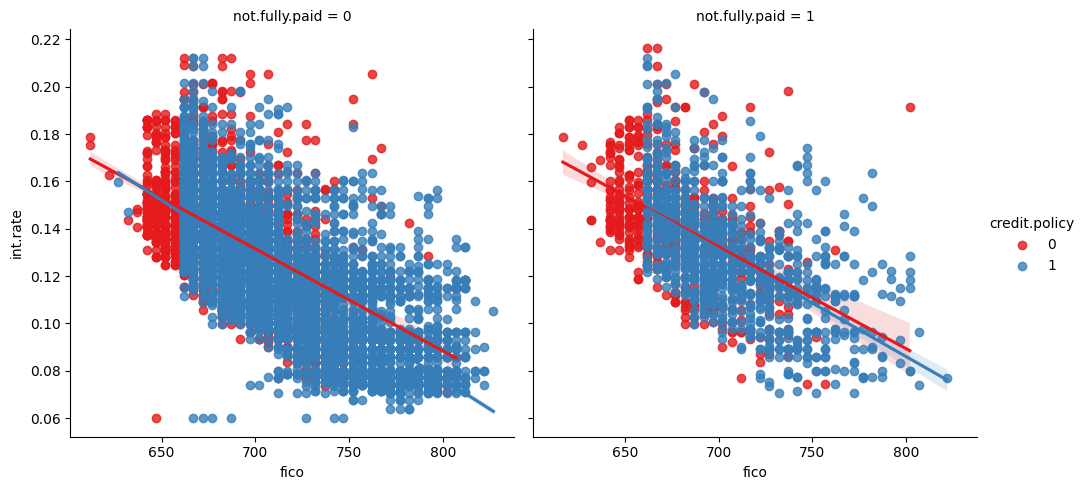

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [ ]:
cat_feats=['purpose']
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

pred = dt.predict(X_test)

print('Decision tree')
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

pred = rfc.predict(X_test)

print('Random Forest')
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

Decision tree
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874

[[1994  437]
 [ 335  108]]
Random Forest
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

[[2423    8]
 [ 435    8]]
